In [1]:
import torch

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.layer_1 = torch.nn.Linear(n_feature, n_hidden)
        self.layer_2 = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        return self.layer_2(torch.relu(self.layer_1(x)))

In [2]:
import torch
x = torch.linspace(-1, 1, 100)
print(x)
print(x.shape)

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

In [3]:
import torch
x = torch.unsqueeze(torch.linspace(-1, 1, 100), 1)
print(x)
print(x.shape)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

Net(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


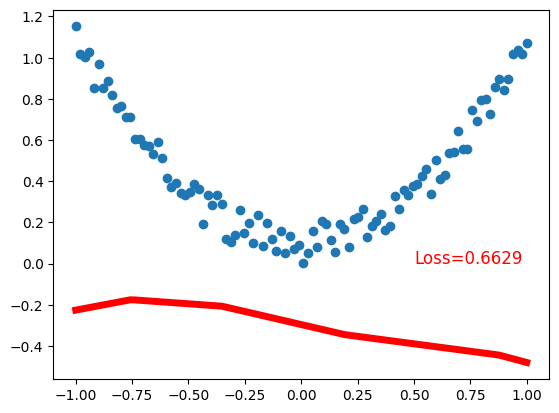

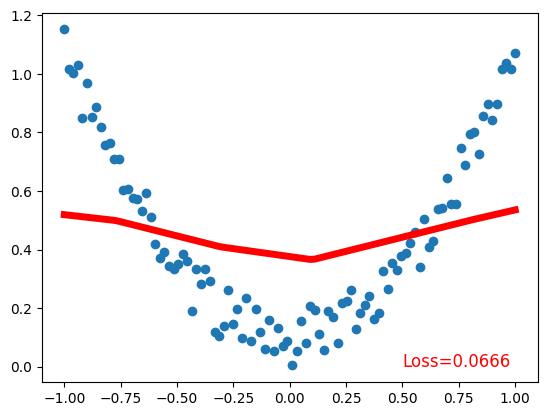

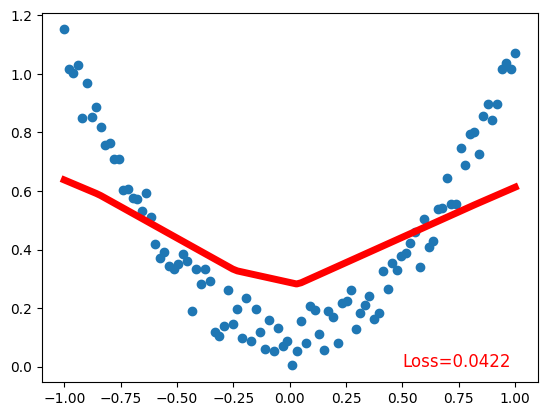

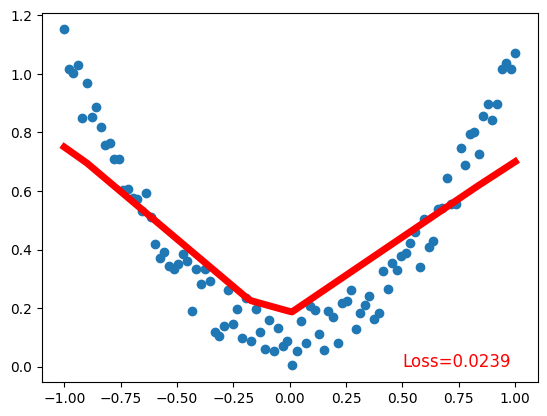

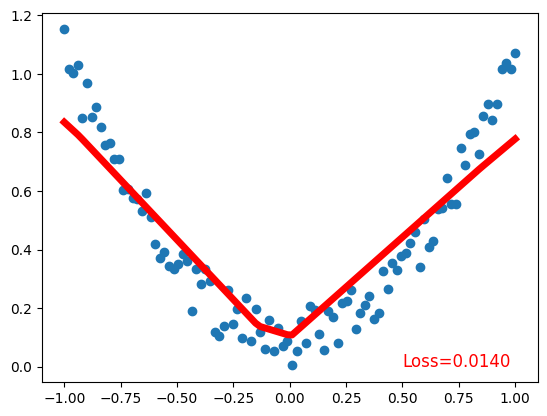

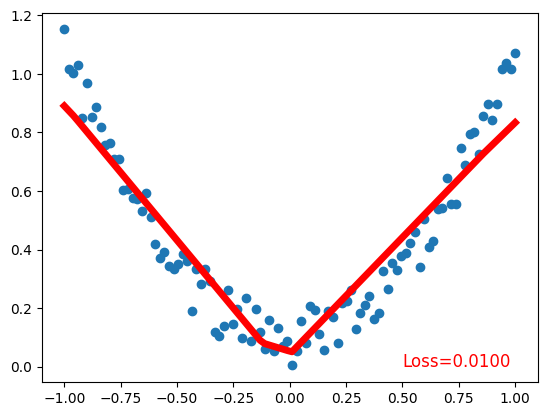

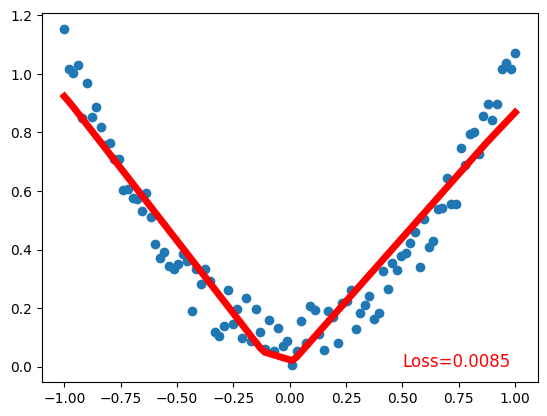

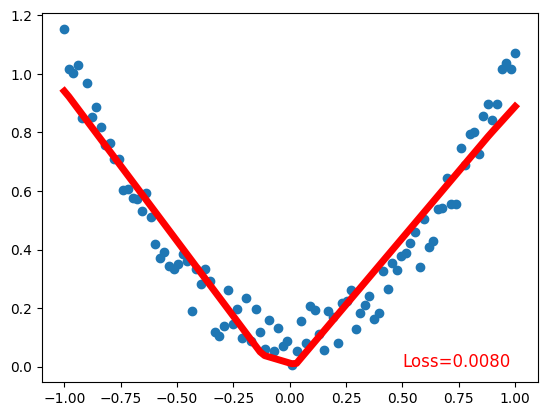

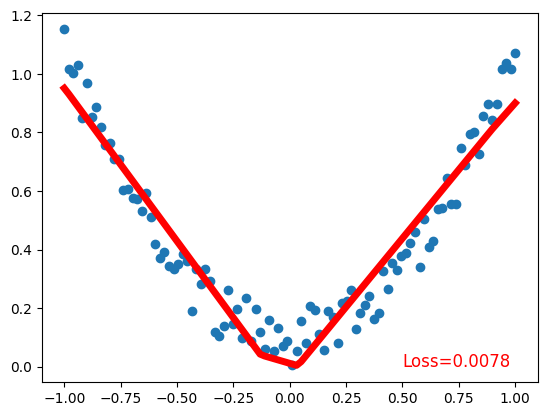

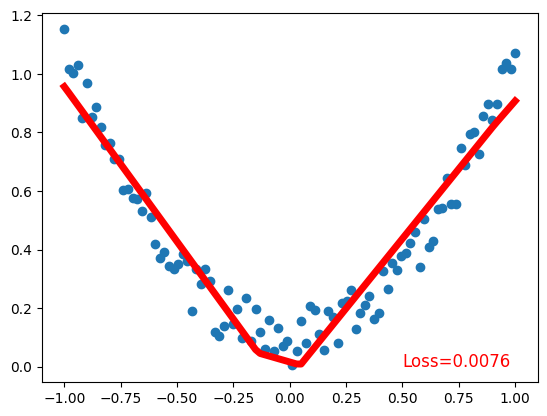

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1) # make it reproducible

# 1. Generate data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # x data (tensor), shape=(100, 1)

#  x^2 + 0.2*noise
y = x.pow(2) + 0.2*torch.rand(x.size()) # noisy y data (tensor), shape=(100, 1)

# 2. Build the network
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

# 3. Train the network
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)

# Mean square error
loss_func = torch.nn.MSELoss()

for t in range(200):
    prediction = net(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # backpropagation, compute gradients
    optimizer.step() # apply gradients

    if t % 20 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy()) # plot data
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5) # plot prediction
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 12, 'color': 'red'}) # plot loss
        plt.show()

Net(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


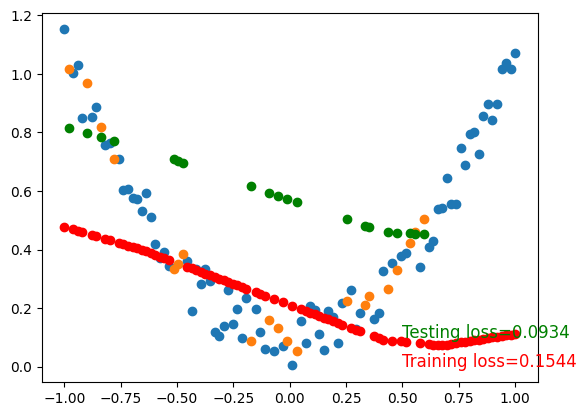

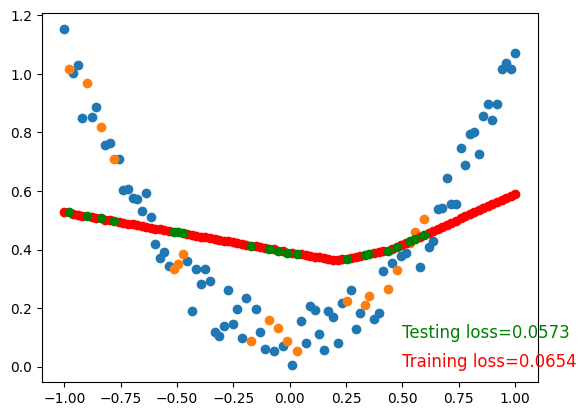

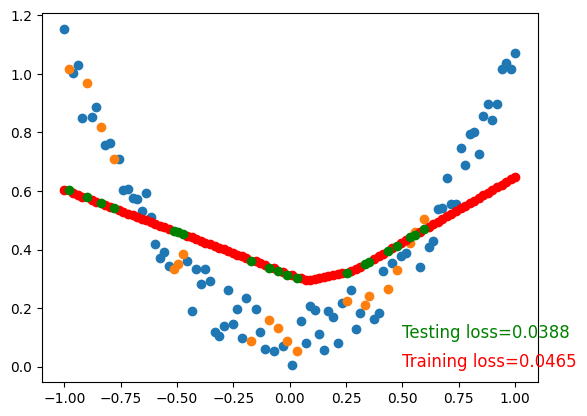

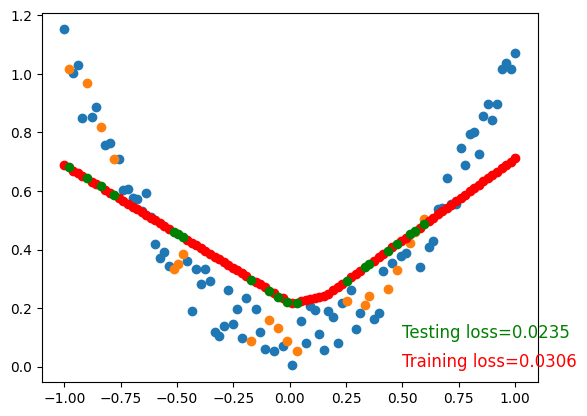

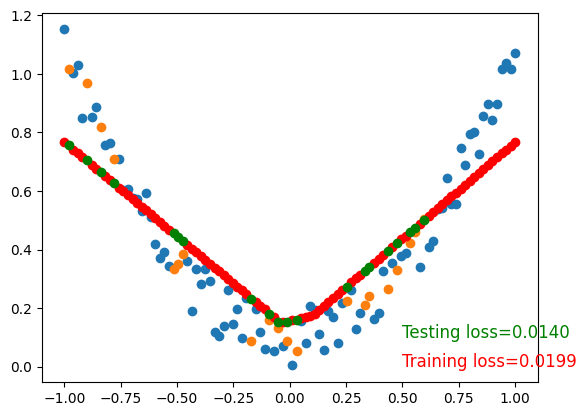

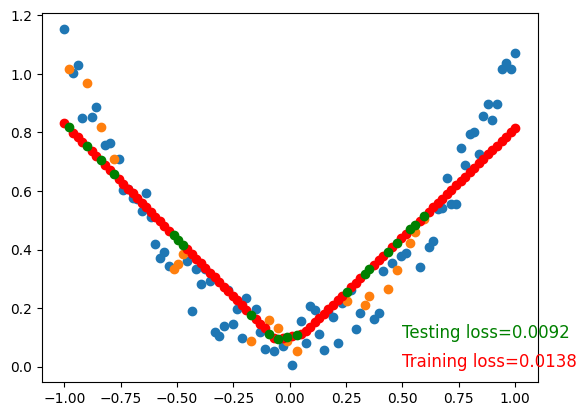

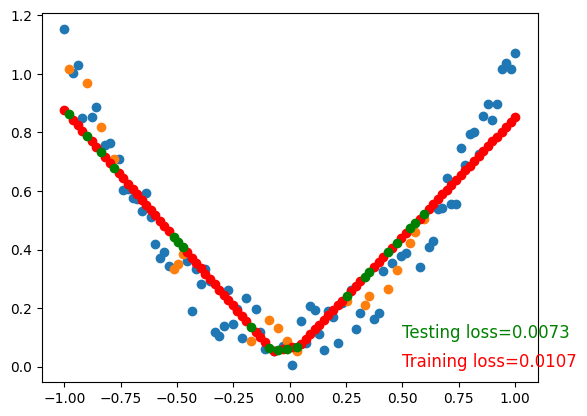

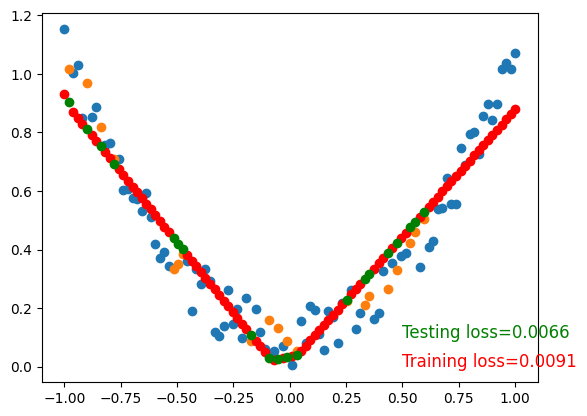

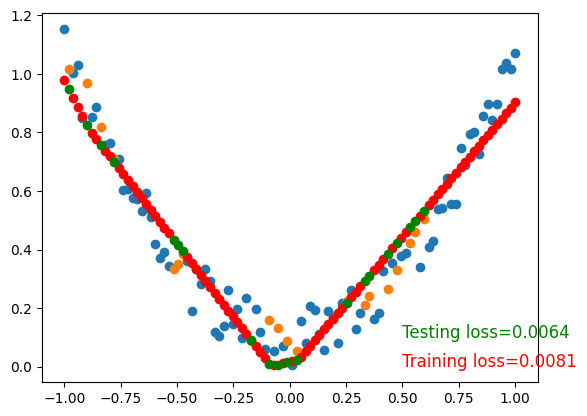

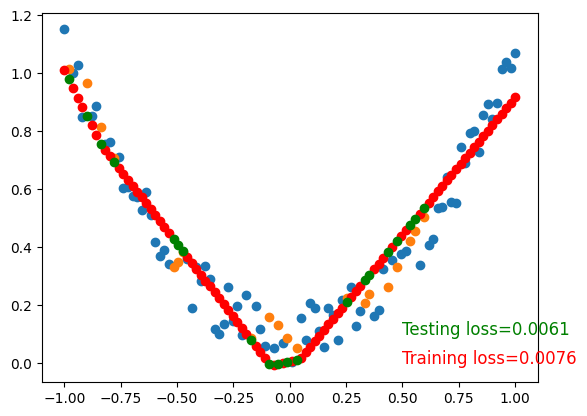

In [5]:
## Draw quadratic equations

import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
torch.manual_seed(1) # reproducible

# 1. Generate data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size()) # noisy y data (tensor), shape=(100, 1)

# Split data into training and testing randomly
indices = torch.randperm(x.size(0))
x_train = torch.index_select(x, dim=0, index=indices[:80])
y_train = torch.index_select(y, dim=0, index=indices[:80])
x_test = torch.index_select(x, dim=0, index=indices[80:])
y_test = torch.index_select(y, dim=0, index=indices[80:])

# 2. Build the network
net = Net(n_feature=1, n_hidden=10, n_output=1) # define the network
print(net) # net architecture

# 3. Train the network
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # define optimizer
loss_func = torch.nn.MSELoss() # define loss function

for t in range(200):
    net.train()

    prediction = net(x_train) # input x and predict based on x
    loss = loss_func(prediction, y_train) # must be (1. nn output, 2. target)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # backpropagation, compute gradients
    optimizer.step() # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.scatter(x_train.data.numpy(), y_train.data.numpy()) # plot training data
        plt.scatter(x_test.data.numpy(), y_test.data.numpy()) # plot testing data

        # plot prediction scatter
        plt.scatter(x_train.data.numpy(), prediction.data.numpy(), color='red')

        net.eval()
        # get prediction on test data
        with torch.inference_mode():
            test_prediction = net(x_test)

            # plot prediction scatter
            plt.scatter(x_test.data.numpy(), test_prediction.data.numpy(), color='green')

            plt.text(0.5, 0, 'Training loss=%.4f' % loss.data.numpy(), fontdict={'size': 12, 'color': 'red'}) # plot loss
            plt.text(0.5, 0.1, 'Testing loss=%.4f' % loss_func(test_prediction, y_test).data.numpy(), fontdict={'size': 12, 'color': 'green'})

        plt.show()

Net(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)
Training loss=0.1544
Testing loss=0.0934

Training loss=0.0654
Testing loss=0.0573

Training loss=0.0465
Testing loss=0.0388

Training loss=0.0306
Testing loss=0.0235

Training loss=0.0199
Testing loss=0.0140

Training loss=0.0138
Testing loss=0.0092

Training loss=0.0107
Testing loss=0.0073

Training loss=0.0091
Testing loss=0.0066

Training loss=0.0081
Testing loss=0.0064

Training loss=0.0076
Testing loss=0.0061



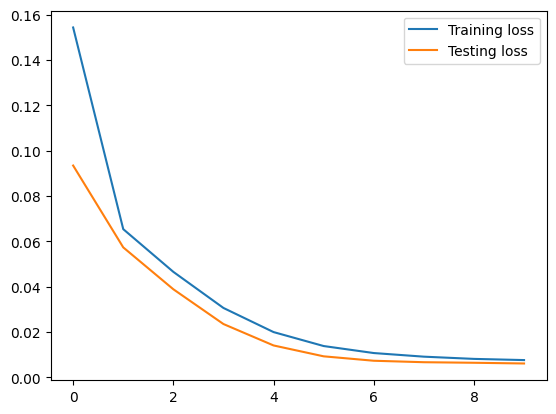

In [6]:
## Draw quadratic equations

import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
torch.manual_seed(1) # reproducible

# 1. Generate data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size()) # noisy y data (tensor), shape=(100, 1)

# Split data into training and testing randomly
indices = torch.randperm(x.size(0))
x_train = torch.index_select(x, dim=0, index=indices[:80])
y_train = torch.index_select(y, dim=0, index=indices[:80])
x_test = torch.index_select(x, dim=0, index=indices[80:])
y_test = torch.index_select(y, dim=0, index=indices[80:])

# 2. Build the network
net = Net(n_feature=1, n_hidden=10, n_output=1) # define the network
print(net) # net architecture

# 3. Train the network
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # define optimizer
loss_func = torch.nn.MSELoss() # define loss function

training_losses = []
testing_losses = []

for t in range(200):
    net.train()

    prediction = net(x_train) # input x and predict based on x
    loss = loss_func(prediction, y_train) # must be (1. nn output, 2. target)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # backpropagation, compute gradients
    optimizer.step() # apply gradients

    if t % 20 == 0:
        net.eval()
        with torch.inference_mode():
            test_prediction = net(x_test)
            test_loss = loss_func(test_prediction, y_test)

            print('Training loss=%.4f' % loss.data.numpy())
            print('Testing loss=%.4f' % test_loss.data.numpy())
            print()

            training_losses.append(loss.data.numpy())
            testing_losses.append(test_loss.data.numpy())

plt.plot(training_losses, label='Training loss')
plt.plot(testing_losses, label='Testing loss')
plt.legend()
plt.show()

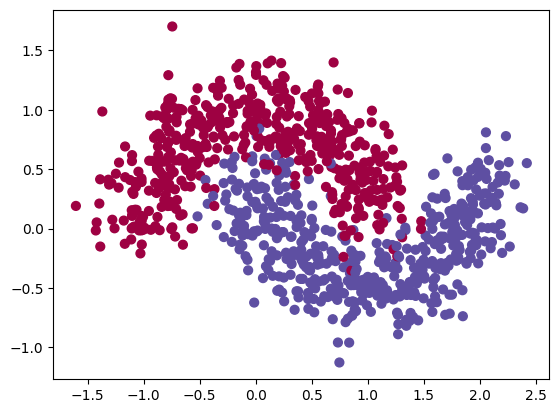

In [7]:
# make moon from sklearn

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Set random seed
torch.manual_seed(1) # reproducible

# 1. Generate data
x, y = make_moons(n_samples=1000, noise=0.2, random_state=1)
x = torch.from_numpy(x).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

# Plot data
plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=40, cmap=plt.cm.Spectral)
plt.show()

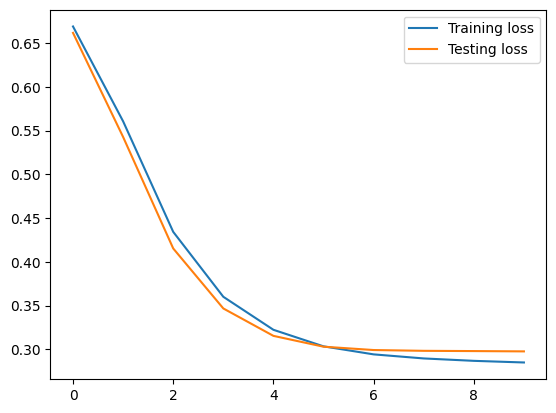

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


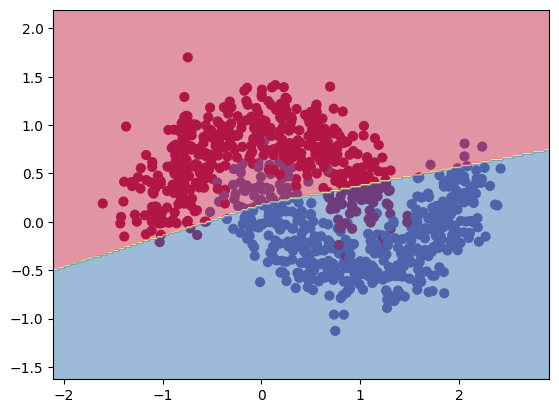

In [8]:
# make moon from sklearn

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Set random seed
torch.manual_seed(1) # reproducible

# 1. Generate data
x, y = make_moons(n_samples=1000, noise=0.2, random_state=1)
x = torch.from_numpy(x).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

# Split data into training and testing randomly
indices = torch.randperm(x.size(0))
x_train = torch.index_select(x, dim=0, index=indices[:800])
y_train = torch.index_select(y, dim=0, index=indices[:800])
x_test = torch.index_select(x, dim=0, index=indices[800:])
y_test = torch.index_select(y, dim=0, index=indices[800:])

# 2. Build the network
net = Net(n_feature=2, n_hidden=5, n_output=2) # define the network

# 3. Train the network
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # define optimizer
loss_func = torch.nn.CrossEntropyLoss() # define loss function

training_losses = []
testing_losses = []

for t in range(200):
    net.train()

    prediction = net(x_train) # input x and predict based on x
    loss = loss_func(prediction, y_train) # must be (1. nn output, 2. target)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # backpropagation, compute gradients
    optimizer.step() # apply gradients

    if t % 20 == 0:
        net.eval()
        with torch.inference_mode():
            test_prediction = net(x_test)
            test_loss = loss_func(test_prediction, y_test)

            # print('Training loss=%.4f' % loss.data.numpy())
            # print('Testing loss=%.4f' % test_loss.data.numpy())
            # print()

            training_losses.append(loss.data.numpy())
            testing_losses.append(test_loss.data.numpy())

plt.plot(training_losses, label='Training loss')
plt.plot(testing_losses, label='Testing loss')
plt.legend()
plt.show()


plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=40, cmap=plt.cm.Spectral)
# Draw model decision boundary
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.02), torch.arange(y_min, y_max, 0.02))

with torch.inference_mode():
    Z = net(torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1))
    Z = torch.argmax(Z, dim=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.show()

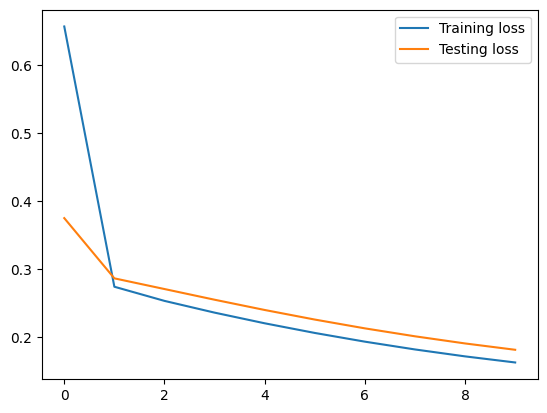

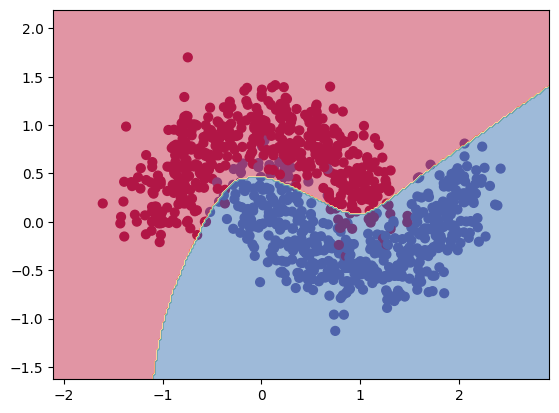

In [9]:
# make moon from sklearn

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Set random seed
torch.manual_seed(1) # reproducible

# 1. Generate data
x, y = make_moons(n_samples=1000, noise=0.2, random_state=1)
x = torch.from_numpy(x).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

# Split data into training and testing randomly
indices = torch.randperm(x.size(0))
x_train = torch.index_select(x, dim=0, index=indices[:800])
y_train = torch.index_select(y, dim=0, index=indices[:800])
x_test = torch.index_select(x, dim=0, index=indices[800:])
y_test = torch.index_select(y, dim=0, index=indices[800:])

# 2. Build the network
net = Net(n_feature=2, n_hidden=300, n_output=2) # define the network

# 3. Train the network
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # define optimizer
loss_func = torch.nn.CrossEntropyLoss() # define loss function

training_losses = []
testing_losses = []

for t in range(200):
    net.train()

    prediction = net(x_train) # input x and predict based on x
    loss = loss_func(prediction, y_train) # must be (1. nn output, 2. target)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # backpropagation, compute gradients
    optimizer.step() # apply gradients

    if t % 20 == 0:
        net.eval()
        with torch.inference_mode():
            test_prediction = net(x_test)
            test_loss = loss_func(test_prediction, y_test)

            # print('Training loss=%.4f' % loss.data.numpy())
            # print('Testing loss=%.4f' % test_loss.data.numpy())
            # print()

            training_losses.append(loss.data.numpy())
            testing_losses.append(test_loss.data.numpy())

plt.plot(training_losses, label='Training loss')
plt.plot(testing_losses, label='Testing loss')
plt.legend()
plt.show()


plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=40, cmap=plt.cm.Spectral)
# Draw model decision boundary
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.02), torch.arange(y_min, y_max, 0.02))

with torch.inference_mode():
    Z = net(torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1))
    Z = torch.argmax(Z, dim=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.show()

In [10]:
from torchvision import models

resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 162MB/s]


In [11]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
# save net model
torch.save(net, 'my_net.pkl')

In [13]:
loaded_net = torch.load('my_net.pkl')
print(loaded_net)

Net(
  (layer_1): Linear(in_features=2, out_features=300, bias=True)
  (layer_2): Linear(in_features=300, out_features=2, bias=True)
)


<ipython-input-13-5379c5df1f77>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_net = torch.load('my_net.pkl')
